# **Load and Clone the Repo including all dependencies**

In [1]:
!git clone https://github.com/fizyr/keras-retinanet.git

fatal: destination path 'keras-retinanet' already exists and is not an empty directory.


In [2]:
%cd keras-retinanet/
!pip install .

/content/keras-retinanet
Processing /content/keras-retinanet
  Created wheel for keras-retinanet: filename=keras_retinanet-0.5.1-cp36-cp36m-linux_x86_64.whl size=169010 sha256=576d84ef241c65201e31cb54455a8666f9eeb672649d606a2476228e3a55e9a0
  Stored in directory: /root/.cache/pip/wheels/b2/9f/57/cb0305f6f5a41fc3c11ad67b8cedfbe9127775b563337827ba
Successfully built keras-retinanet
  Found existing installation: keras-retinanet 0.5.1
    Uninstalling keras-retinanet-0.5.1:
      Successfully uninstalled keras-retinanet-0.5.1


In [3]:
!python setup.py build_ext --inplace

running build_ext
skipping 'keras_retinanet/utils/compute_overlap.c' Cython extension (up-to-date)
copying build/lib.linux-x86_64-3.6/keras_retinanet/utils/compute_overlap.cpython-36m-x86_64-linux-gnu.so -> keras_retinanet/utils


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import requests
import urllib
import os
import pandas as pd
from PIL import Image

from keras_retinanet import models
from keras_retinanet.utils.image import preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

# **Load the CSV file**
Load the csv file and convert it to a pandas DataFrame and plot the training images for sanity check

In [6]:
ann = pd.read_csv("/content/drive/My Drive/Colab Notebooks/annotations.csv", names=["image_name","x_min","y_min","x_max", "y_max","class_name"])
ann.head()

image_name  x_min  ...  y_max  class_name
0  /content/drive/My Drive/Colab Notebooks/train_...    189  ...    400   Mongoloid
1  /content/drive/My Drive/Colab Notebooks/train_...    560  ...    351   Caucasian
2  /content/drive/My Drive/Colab Notebooks/train_...    320  ...    378     Negroid
3  /content/drive/My Drive/Colab Notebooks/train_...     91  ...     79   Mongoloid
4  /content/drive/My Drive/Colab Notebooks/train_...    215  ...    107   Mongoloid

[5 rows x 6 columns]

In [0]:
ann_test = pd.read_csv("/content/drive/My Drive/Colab Notebooks/annotations_test.csv", names=["image_name","x_min","y_min","x_max", "y_max","class_name"])

In [0]:
def show_image_with_boxes(df):
  # pick a random image
  filepath = df.sample()['image_name'].values[0]

  # get all rows for this image
  df2 = df[df['image_name'] == filepath]
  im = np.array(Image.open(filepath))

  # if there's a PNG it will have alpha channel
  im = im[:,:,:3]

  for idx, row in df2.iterrows():
    d_class = row["class_name"]
    box = [
      row['x_min'],
      row['y_min'],
      row['x_max'],
      row['y_max'],
    ]
    print(box)
    
    draw_box(im, box, color=(255, 0, 0))
    caption = "{}".format(d_class)
    draw_caption(im, box, caption)

  plt.axis('off')
  plt.imshow(im)
  plt.show()

In [0]:
plt.rcParams['figure.figsize'] = [20, 10]

[8, 29, 217, 265]
[220, 18, 380, 259]


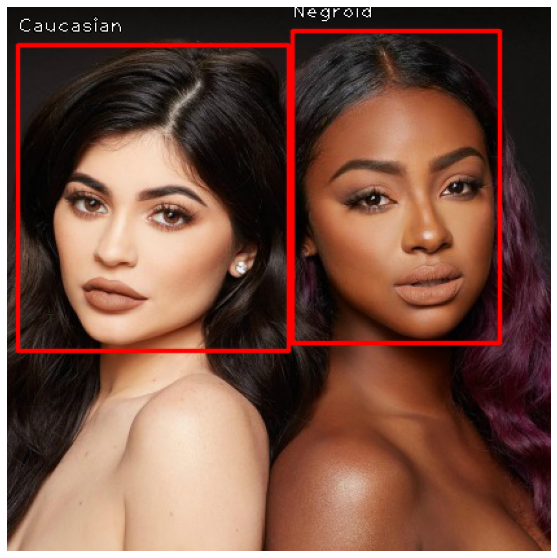

In [272]:
show_image_with_boxes(ann)

In [274]:
show_image_with_boxes(ann)

[55, 152, 260, 399]
[535, 109, 705, 341]
[265, 54, 432, 273]


# **Train the Model**
- First convert back the Pandas DataFrame back to it's CSV format
- Create a CSV file to represent the encoding of the classes, which until now are not integers
- Create a snapshot directory to save the model after each epoch 

In [0]:
ann.to_csv('annotation.csv', index=False, header=None)

In [0]:
classes = ['Mongoloid', 'Negroid', 'Caucasian']
with open('classes.csv', 'w') as f:
    for i, class_name in enumerate(classes):
        f.write(f'{class_name},{i}\n')

In [8]:
!head classes.csv

Mongoloid,0
Negroid,1
Caucasian,2


In [9]:
!head annotation.csv

/content/drive/My Drive/Colab Notebooks/train_images/0207_china-adoption01-1000x666.jpg,189,54,466,400,Mongoloid
/content/drive/My Drive/Colab Notebooks/train_images/0207_china-adoption01-1000x666.jpg,560,17,790,351,Caucasian
/content/drive/My Drive/Colab Notebooks/train_images/0229_PMAD_MPARSONS.jpg,320,65,592,378,Negroid
/content/drive/My Drive/Colab Notebooks/train_images/05223211.jpg,91,16,143,79,Mongoloid
/content/drive/My Drive/Colab Notebooks/train_images/05223211.jpg,215,47,260,107,Mongoloid
/content/drive/My Drive/Colab Notebooks/train_images/05223211.jpg,321,37,366,110,Mongoloid
/content/drive/My Drive/Colab Notebooks/train_images/05223211.jpg,393,49,437,103,Mongoloid
/content/drive/My Drive/Colab Notebooks/train_images/05223211.jpg,490,59,540,110,Mongoloid
/content/drive/My Drive/Colab Notebooks/train_images/07247b919cef71df262c16daa8e72550.jpg,186,7,374,284,Negroid
/content/drive/My Drive/Colab Notebooks/train_images/07247b919cef71df262c16daa8e72550.jpg,64,6,196,172,Negroid

In [0]:
if not os.path.exists('snapshots'):
  os.mkdir('snapshots')

In [10]:
PRETRAINED_MODEL = 'snapshots/_pretrained_model.h5'
URL_MODEL = 'https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet50_coco_best_v2.1.0.h5'
urllib.request.urlretrieve(URL_MODEL, PRETRAINED_MODEL)

print('Downloaded pretrained model to ' + PRETRAINED_MODEL)

Downloaded pretrained model to snapshots/_pretrained_model.h5


In [11]:
!ls keras-retinanet

build		 images		  README.md	    setup.py
CONTRIBUTORS.md  keras_retinanet  requirements.txt  snapshots
examples	 LICENSE	  setup.cfg	    tests


In [13]:
!keras-retinanet/keras_retinanet/bin/train.py --freeze-backbone \
  --random-transform \
  --weights {PRETRAINED_MODEL} \
  --batch-size 8 \
  --steps 500 \
  --epochs 20 \
  csv annotation.csv classes.csv

Using TensorFlow backend.
2020-05-22 09:20:39.185869: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Creating model, this may take a second...
2020-05-22 09:37:41.666976: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-05-22 09:37:41.729437: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-05-22 09:37:41.730269: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla K80 computeCapability: 3.7
coreClock: 0.8235GHz coreCount: 13 deviceMemorySize: 11.17GiB deviceMemoryBandwidth: 223.96GiB/s
2020-05-22 09:37:41.730332: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
20

# **Create an Inference Graph**
Create an inference model to make prediction on unseen data

In [14]:
!ls snapshots

_pretrained_model.h5  resnet50_csv_02.h5
resnet50_csv_01.h5    resnet50_csv_03.h5


In [15]:
from glob import glob
model_paths = glob('snapshots/resnet50_csv_*.h5')
latest_path = sorted(model_paths)[-1]
print("path:", latest_path)

model = models.load_model(latest_path, backbone_name='resnet50')
model = models.convert_model(model)

label_map = {}
for line in open('classes.csv'):
  row = line.rstrip().split(',')
  label_map[int(row[1])] = row[0]

path: snapshots/resnet50_csv_03.h5


Using TensorFlow backend.


tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-22.627417, -11.313708,  22.627417,  11.313708],
       [-28.50876 , -14.25438 ,  28.50876 ,  14.25438 ],
       [-35.918785, -17.959393,  35.918785,  17.959393],
       [-16.      , -16.      ,  16.      ,  16.      ],
       [-20.158737, -20.158737,  20.158737,  20.158737],
       [-25.398417, -25.398417,  25.398417,  25.398417],
       [-11.313708, -22.627417,  11.313708,  22.627417],
       [-14.25438 , -28.50876 ,  14.25438 ,  28.50876 ],
       [-17.959393, -35.918785,  17.959393,  35.918785]], dtype=float32)> anchors
tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-45.254833, -22.627417,  45.254833,  22.627417],
       [-57.01752 , -28.50876 ,  57.01752 ,  28.50876 ],
       [-71.83757 , -35.918785,  71.83757 ,  35.918785],
       [-32.      , -32.      ,  32.      ,  32.      ],
       [-40.317474, -40.317474,  40.317474,  40.317474],
       [-50.796833, -50.796833,  50.7

In [0]:
def show_image_with_predictions(df, threshold=0.6):
  # choose a random image
  row = df.sample()
  filepath = row['image_name'].values[0]
  print("filepath:", filepath)

  # get all rows for this image
  df2 = df[df['image_name'] == filepath]
  im = np.array(Image.open(filepath))
  print("im.shape:", im.shape)

  # if there's a PNG it will have alpha channel
  im = im[:,:,:3]

  # plot true boxes
  for idx, row in df2.iterrows():
    box = [
      row['x_min'],
      row['y_min'],
      row['x_max'],
      row['y_max'],
    ]
    #print(box)
    #draw_box(im, box, color=(255, 0, 0))
  
  ### plot predictions ###

  # get predictions
  imp = preprocess_image(im)
  imp, scale = resize_image(im)

  boxes, scores, labels = model.predict_on_batch(
    np.expand_dims(imp, axis=0)
  )

  # standardize box coordinates
  boxes /= scale

  # loop through each prediction for the input image
  for box, score, label in zip(boxes[0], scores[0], labels[0]):
    # scores are sorted so we can quit as soon
    # as we see a score below threshold
    if score < threshold:
      break

    box = box.astype(np.int32)
    color = label_color(label)
    draw_box(im, box, color=color)

    class_name = label_map[label]
    caption = f"{class_name} {score:.2f}"
    draw_caption(im, box, caption)

  plt.axis('off')
  plt.imshow(im)
  plt.show()

In [25]:
show_image_with_predictions(ann, threshold=0.4)

filepath: /content/drive/My Drive/Colab Notebooks/train_images/gettyimages-494552482-1024x1024.jpg
im.shape: (683, 1024, 3)


In [28]:
show_image_with_predictions(ann, threshold=0.4)

filepath: /content/drive/My Drive/Colab Notebooks/train_images/gallery_medium.jpg
im.shape: (400, 600, 3)


In [289]:
show_image_with_predictions(ann, threshold=0.5)

filepath: /content/drive/My Drive/Colab Notebooks/train_images/74fb2b7f2b8894f3f0b818dee84c365f-56a4f5f811ffaad5a47ba5478cc03e0c9393f28a-s800-c85.jpg
im.shape: (600, 800, 3)


filepath: /content/drive/My Drive/Colab Notebooks/train_images/q36.JPG
im.shape: (472, 707, 3)


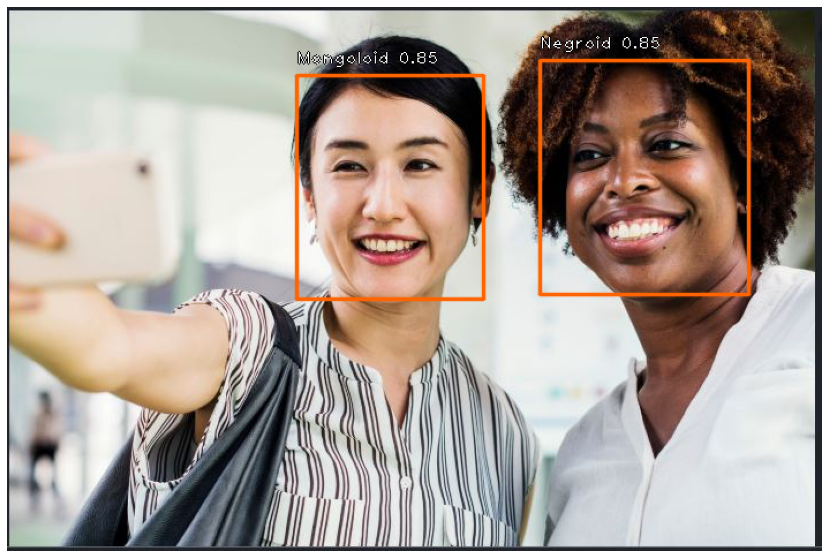

In [299]:
show_image_with_predictions(ann, threshold=0.7)

filepath: /content/drive/My Drive/Colab Notebooks/train_images/q35.JPG
im.shape: (475, 621, 3)


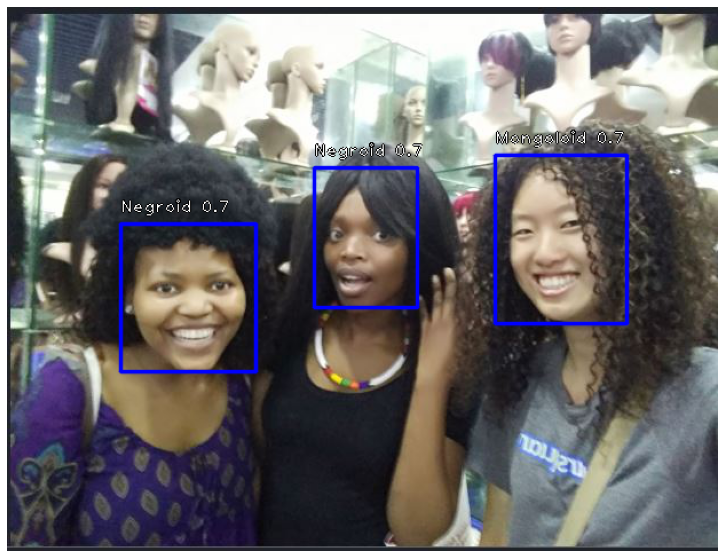

In [303]:
show_image_with_predictions(ann, threshold=0.6)

In [305]:
show_image_with_predictions(ann, threshold=0.55)

filepath: /content/drive/My Drive/Colab Notebooks/train_images/when-china-black-white-3.jpg
im.shape: (394, 700, 3)


filepath: /content/drive/My Drive/Colab Notebooks/train_images/trump-kanye-race-summit.jpg
im.shape: (635, 1000, 3)


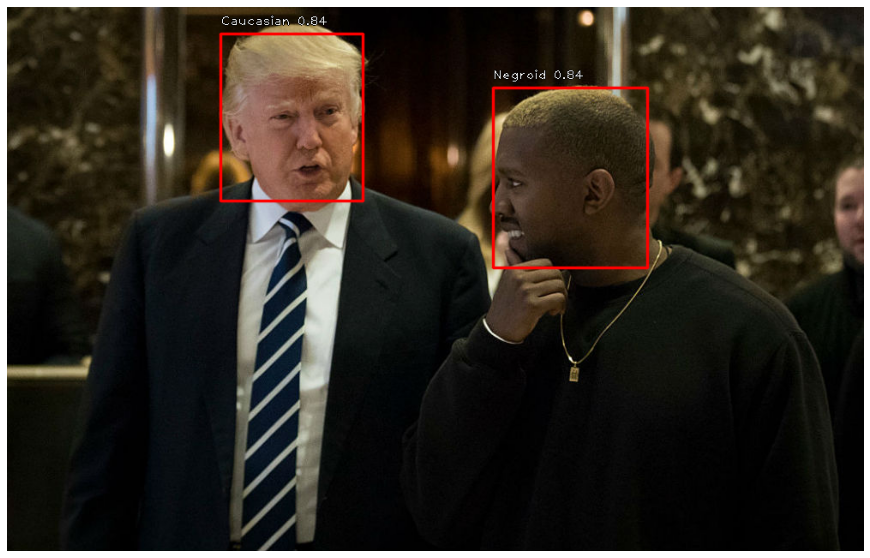

In [310]:
show_image_with_predictions(ann, threshold=0.7)

In [314]:
show_image_with_predictions(ann, threshold=0.7)

filepath: /content/drive/My Drive/Colab Notebooks/train_images/q14.JPG
im.shape: (445, 643, 3)


filepath: /content/drive/My Drive/Colab Notebooks/train_images/istockphoto-1170302125-612x612.jpg
im.shape: (408, 612, 3)


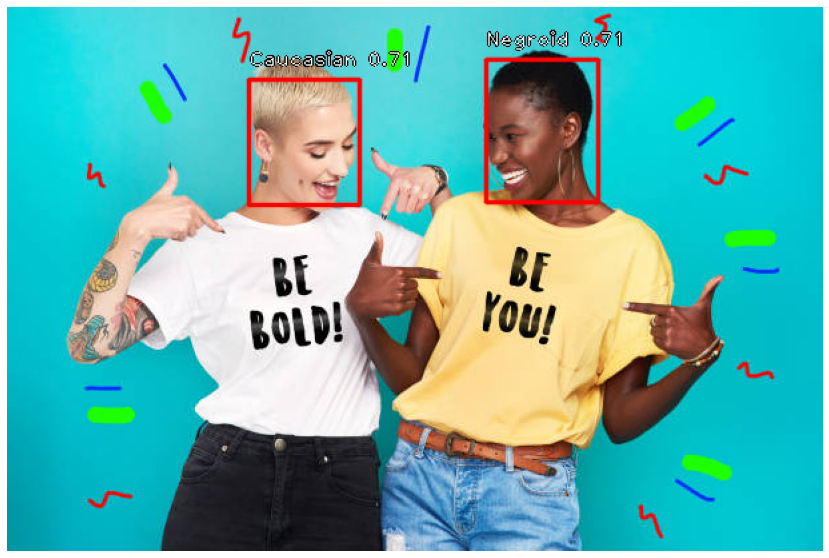

In [320]:
show_image_with_predictions(ann, threshold=0.4)

filepath: /content/drive/My Drive/Colab Notebooks/train_images/960x0.jpg
im.shape: (640, 960, 3)


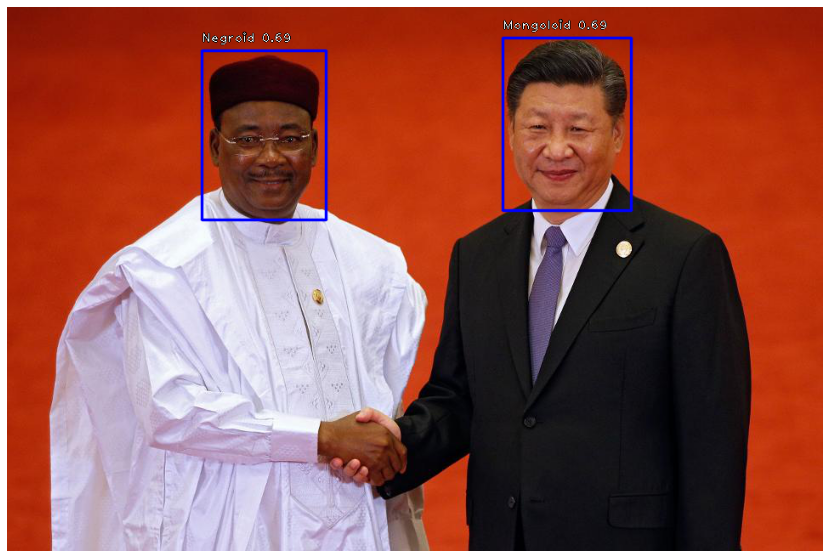

In [323]:
show_image_with_predictions(ann, threshold=0.5)

In [355]:
!wget https://images.bewakoof.com/t540/last-man-standing-full-sleeve-t-shirt-men-s-printed-full-sleeve-t-shirt-266587-1586317114.jpg

--2020-05-22 13:40:11--  https://images.bewakoof.com/t540/last-man-standing-full-sleeve-t-shirt-men-s-printed-full-sleeve-t-shirt-266587-1586317114.jpg
Resolving images.bewakoof.com (images.bewakoof.com)... 23.38.130.176
Connecting to images.bewakoof.com (images.bewakoof.com)|23.38.130.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48998 (48K) [image/jpeg]
Saving to: ‘last-man-standing-full-sleeve-t-shirt-men-s-printed-full-sleeve-t-shirt-266587-1586317114.jpg’

last-man-standing-f 100%[===================>]  47.85K   115KB/s    in 0.4s    

2020-05-22 13:40:11 (115 KB/s) - ‘last-man-standing-full-sleeve-t-shirt-men-s-printed-full-sleeve-t-shirt-266587-1586317114.jpg’ saved [48998/48998]



In [366]:
show_image_with_predictions('last-man-standing-full-sleeve-t-shirt-men-s-printed-full-sleeve-t-shirt-266587-1586317114.jpg' , threshold=0.49)

im.shape: (675, 540, 3)
